In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Q1. What is the distribution of book prices?

In [3]:
df = pd.read_csv('books1.csv')

In [4]:
df

,Title,Price,Star,category,availability
0,A Light in the Attic,51.77,Three,Poetry,22
1,Tipping the Velvet,53.74,One,Historical Fiction,20
2,Soumission,50.10,One,Fiction,20
3,Sharp Objects,47.82,Four,Mystery,20
4,Sapiens: A Brief History of Humankind,54.23,Five,History,20
...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One,Classics,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four,Sequential Art,1
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five,Historical Fiction,1
998,1st to Die (Women's Murder Club #1),53.98,One,Mystery,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1000 non-null   object 
 1   Price         1000 non-null   float64
 2   Star          1000 non-null   object 
 3   category      1000 non-null   object 
 4   availability  1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [6]:
df.columns

Index(['Title', 'Price', 'Star', 'category', 'availability'], dtype='object')

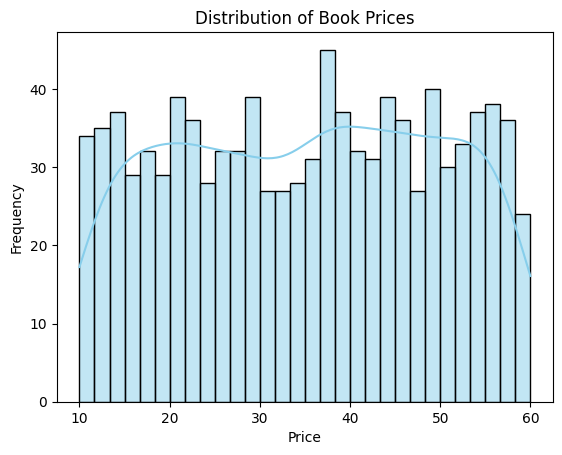

In [7]:
sns.histplot(df['Price'], bins = 30, kde = True, color = 'skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Q2. Are there any outliers in book prices?

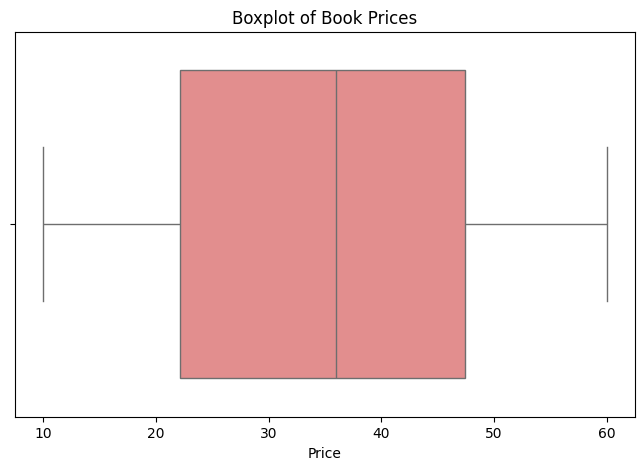

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Price'], color='lightcoral')
plt.title('Boxplot of Book Prices')
plt.xlabel('Price')
plt.show()

# Q3.	What is the frequency of each star rating?

In [9]:
df.columns

Index(['Title', 'Price', 'Star', 'category', 'availability'], dtype='object')

In [10]:
star_rating = df['Star'].value_counts()
print(star_rating)

Star
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64


# Q4.	Which categories are most and least represented?

In [11]:
df.columns

Index(['Title', 'Price', 'Star', 'category', 'availability'], dtype='object')

In [12]:
df['category']

0                  Poetry
1      Historical Fiction
2                 Fiction
3                 Mystery
4                 History
              ...        
995              Classics
996        Sequential Art
997    Historical Fiction
998               Mystery
999                Travel
Name: category, Length: 1000, dtype: object

In [13]:
category_counts = df['category'].value_counts()

most_represented = category_counts.idxmax()
least_represented = category_counts.idxmin()

print('Most Represented:',most_represented, 'with', category_counts.max(),'books')
print('least_represented category', least_represented, 'with', category_counts.min(),'books')

Most Represented: Default with 152 books
least_represented category Crime with 1 books


# Q5.	What is the average price of books per category?

In [14]:
df.columns

Index(['Title', 'Price', 'Star', 'category', 'availability'], dtype='object')

In [15]:
average_price_per_category = df.groupby('category')['Price'].mean()
print(average_price_per_category)

category
Academic              13.120000
Add a comment         35.796418
Adult Fiction         15.360000
Art                   38.520000
Autobiography         37.053333
Biography             33.662000
Business              32.460000
Childrens             32.638276
Christian             42.496667
Christian Fiction     34.385000
Classics              36.545263
Contemporary          36.200000
Crime                 10.970000
Cultural              36.580000
Default               34.392697
Erotica               19.190000
Fantasy               39.593958
Fiction               36.066615
Food and Drink        31.414667
Health                51.452500
Historical            22.830000
Historical Fiction    33.644231
History               37.295000
Horror                35.949412
Humor                 33.501000
Music                 35.636923
Mystery               31.719062
New Adult             46.383333
Nonfiction            34.260182
Novels                54.810000
Paranormal            15.400000

# Q6.	How does price vary across star ratings?

In [16]:
df.columns

Index(['Title', 'Price', 'Star', 'category', 'availability'], dtype='object')

In [17]:
price_by_rating = df.groupby('Star')['Price'].mean()
print(price_by_rating)

Star
Five     35.374490
Four     36.093296
One      34.561195
Three    34.692020
Two      34.810918
Name: Price, dtype: float64


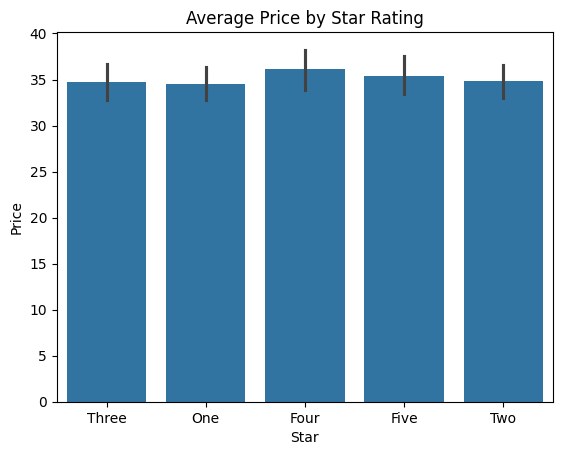

In [18]:
sns.barplot(x='Star', y='Price', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Average Price by Star Rating')
plt.show()

# Q7.	Are books with higher star ratings more expensive

In [19]:
df.columns

Index(['Title', 'Price', 'Star', 'category', 'availability'], dtype='object')

In [20]:
df['Star']

0      Three
1        One
2        One
3       Four
4       Five
       ...  
995      One
996     Four
997     Five
998      One
999     Five
Name: Star, Length: 1000, dtype: object

In [21]:
df['Price'].info

<bound method Series.info of 0      51.77
1      53.74
2      50.10
3      47.82
4      54.23
       ...  
995    55.53
996    57.06
997    16.97
998    53.98
999    26.08
Name: Price, Length: 1000, dtype: float64>

In [22]:
price_by_rating = df.groupby('Star')['Price'].mean()
print(price_by_rating)


Star
Five     35.374490
Four     36.093296
One      34.561195
Three    34.692020
Two      34.810918
Name: Price, dtype: float64


# Q8.	Are there categories where all books have the same rating?

In [23]:
df.columns

Index(['Title', 'Price', 'Star', 'category', 'availability'], dtype='object')

In [24]:
same_rating = df.groupby('category')['Star'].nunique()
categories_with_same_rating = same_rating[same_rating==1].index.tolist()
print(categories_with_same_rating)


['Academic', 'Adult Fiction', 'Crime', 'Cultural', 'Erotica', 'Novels', 'Paranormal', 'Parenting', 'Short Stories', 'Suspense']


# Q9.	How many books are listed as in stock?

In [25]:
df['availability']

0      22
1      20
2      20
3      20
4      20
       ..
995     1
996     1
997     1
998     1
999     1
Name: availability, Length: 1000, dtype: int64

In [26]:
in_stock = df[df['availability']== True].shape[0]
print(f'Number of books in stock:{in_stock}')

Number of books in stock:98


# Q10.	What is the correlation between availability and price (if converted numerically)?

In [27]:
df.Price

0      51.77
1      53.74
2      50.10
3      47.82
4      54.23
       ...  
995    55.53
996    57.06
997    16.97
998    53.98
999    26.08
Name: Price, Length: 1000, dtype: float64

In [28]:
df['availability'] = df['availability'].map({'Yes':1,'No':0})
corr = df['availability'].corr(df['Price'])
print(f'Correlation between availability and price: {corr}')

Correlation between availability and price: nan
